In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Austin ABIA Airport Passenger Analysis**

In [149]:
import seaborn as sns

In [150]:
from matplotlib import pyplot as plt
import numpy as np
!pip install matrixprofile 
import matrixprofile as mp

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [152]:
data=pd.read_excel('/content/drive/MyDrive/Released Records_21FO003112 (1) (1).xlsx')  
data

,Date,Austin Bergstrom International (AUS)
0,2021-03-22,13233
1,2021-03-21,16360
2,2021-03-20,10634
3,2021-03-19,12608
4,2021-03-18,13436
...,...,...
807,2019-01-05,16446
808,2019-01-04,19516
809,2019-01-03,21204
810,2019-01-02,22821


**Adding the Day column**

In [153]:

data['Day'] = data['Date'].dt.day_name()
  
data
df = pd.DataFrame()    
df=data

In [154]:
df.head(50)

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday
5,2021-03-17,12136,Wednesday
6,2021-03-16,13270,Tuesday
7,2021-03-15,17140,Monday
8,2021-03-14,16181,Sunday
9,2021-03-13,15083,Saturday


In [155]:
df.columns

Index(['Date', 'Austin Bergstrom International (AUS) ', 'Day'], dtype='object')

**Rearranging data for required analysis**

In [156]:
monday = []
tuesday = []
wednesday = []
thursday = []
friday = []
saturday = []
sunday = []
i=0
for value in df["Day"]:
    if value == 'Monday':
        monday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Tuesday':
        tuesday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Wednesday':
        wednesday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Thursday':
        thursday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Friday':
        friday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Saturday':
        saturday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Sunday':
        sunday.append(df.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
        
    
    
      
    

dfinal = pd.DataFrame()    
dfinal["Monday"] = monday 
dfinal["Tuesday"] = tuesday
dfinal["Wednesday"] = wednesday
dfinal["Thursday"] = thursday
dfinal["Friday"] = friday 
dfinal["Saturday"] = saturday
dfinal["Sunday"] = sunday
dfinal
    

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,13233,13270,12136,13436,12608,10634,16360
1,17140,7222,9195,15149,17832,15083,16181
2,12452,5823,6576,10618,11175,9389,14753
3,9777,4885,6408,10240,9708,6745,12262
4,7112,0,750,2836,9001,9294,10379
...,...,...,...,...,...,...,...
111,19968,14256,15389,20235,21495,12514,17195
112,18661,17862,16867,20983,20403,12258,20125
113,23913,14790,17832,21426,23277,13842,18563
114,17880,14628,15571,18494,19401,12654,19243


**Here I have started week number with 1 for the analysis**

In [157]:
week=[]
i=1
for value in dfinal["Monday"]:
        week.append(i)
        i=i+1

dfinal["Week"] = week

In [158]:
dfinal.head(20)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week
0,13233,13270,12136,13436,12608,10634,16360,1
1,17140,7222,9195,15149,17832,15083,16181,2
2,12452,5823,6576,10618,11175,9389,14753,3
3,9777,4885,6408,10240,9708,6745,12262,4
4,7112,0,750,2836,9001,9294,10379,5
5,9,4615,6523,9819,10641,7643,5740,6
6,7842,4362,5056,8065,7949,5590,8777,7
7,6340,3782,4656,7193,7035,4961,9326,8
8,6411,4719,4639,6657,7122,4695,8369,9
9,9226,4379,5103,7500,8647,5846,8077,10


**Clustering by K means**

**I have used 7 days as features in clustering**

In [159]:

x = dfinal[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']].values

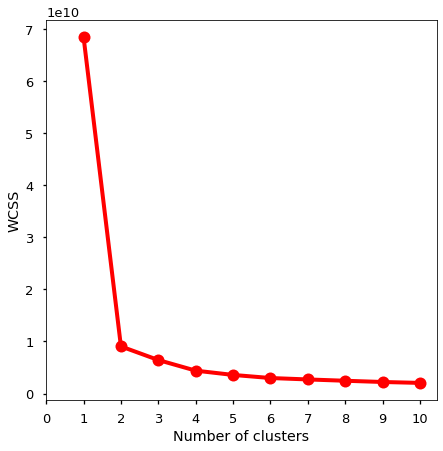

In [160]:

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**Here 3 came out as optimal number of clusters**

In [161]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [162]:
model.cluster_centers_

array([[26906.79591837, 27090.69387755, 22818.93877551, 24106.30612245,
        26510.57142857, 27099.04081633, 20275.42857143],
       [ 7787.62745098,  6978.41176471,  4907.76470588,  5255.01960784,
         6803.88235294,  7182.58823529,  5829.74509804],
       [20233.5       , 20407.3125    , 16267.375     , 17636.625     ,
        20749.0625    , 21352.1875    , 14008.0625    ]])

In [163]:
model.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [164]:

unique, counts = np.unique(model.labels_, return_counts=True)

In [165]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 49, 1: 51, 2: 16}

In [166]:
dfinal["cluster"] = model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



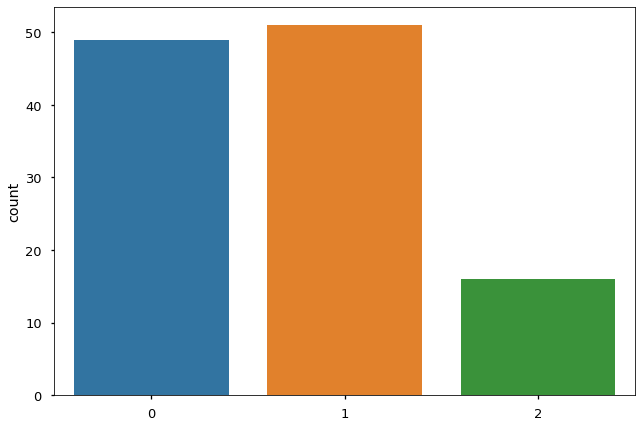

In [167]:
sns.countplot(y_clusters)

In [168]:
model.inertia_

6433120664.524909

**This is the table with added column of Cluster to which a particular row belong**

In [169]:
dfinal.head(50)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week,cluster
0,13233,13270,12136,13436,12608,10634,16360,1,2
1,17140,7222,9195,15149,17832,15083,16181,2,2
2,12452,5823,6576,10618,11175,9389,14753,3,1
3,9777,4885,6408,10240,9708,6745,12262,4,1
4,7112,0,750,2836,9001,9294,10379,5,1
5,9,4615,6523,9819,10641,7643,5740,6,1
6,7842,4362,5056,8065,7949,5590,8777,7,1
7,6340,3782,4656,7193,7035,4961,9326,8,1
8,6411,4719,4639,6657,7122,4695,8369,9,1
9,9226,4379,5103,7500,8647,5846,8077,10,1


**This is the line plot of cluster wrt week number to which it belong**

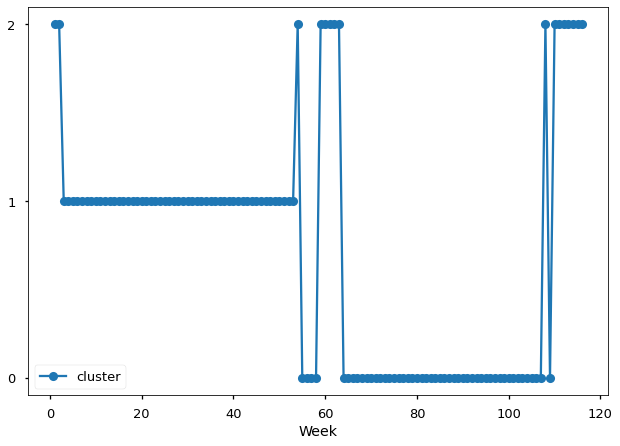

In [170]:
from matplotlib.pyplot import MultipleLocator
ax = plt.gca()

dfinal.plot(kind='line',x='Week',y='cluster',ax=ax,marker='o')
y_major_locator=MultipleLocator(1)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)
plt.show()


In [171]:
dfinal

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week,cluster
0,13233,13270,12136,13436,12608,10634,16360,1,2
1,17140,7222,9195,15149,17832,15083,16181,2,2
2,12452,5823,6576,10618,11175,9389,14753,3,1
3,9777,4885,6408,10240,9708,6745,12262,4,1
4,7112,0,750,2836,9001,9294,10379,5,1
...,...,...,...,...,...,...,...,...,...
111,19968,14256,15389,20235,21495,12514,17195,112,2
112,18661,17862,16867,20983,20403,12258,20125,113,2
113,23913,14790,17832,21426,23277,13842,18563,114,2
114,17880,14628,15571,18494,19401,12654,19243,115,2


In [172]:

data.head()

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday


In [173]:
data

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday
...,...,...,...
807,2019-01-05,16446,Saturday
808,2019-01-04,19516,Friday
809,2019-01-03,21204,Thursday
810,2019-01-02,22821,Wednesday


In [174]:
week=[]
i=1
for value in data["Day"]:
    week.append(i)
    if value=='Tuesday': 
        i=i+1

data["Week"] = week

In [175]:
data.head(20)

,Date,Austin Bergstrom International (AUS),Day,Week
0,2021-03-22,13233,Monday,1
1,2021-03-21,16360,Sunday,1
2,2021-03-20,10634,Saturday,1
3,2021-03-19,12608,Friday,1
4,2021-03-18,13436,Thursday,1
5,2021-03-17,12136,Wednesday,1
6,2021-03-16,13270,Tuesday,1
7,2021-03-15,17140,Monday,2
8,2021-03-14,16181,Sunday,2
9,2021-03-13,15083,Saturday,2


In [176]:
data.isnull().sum()

Date                                     0
Austin Bergstrom International (AUS)     0
Day                                      0
Week                                     0
dtype: int64

In [177]:
data.columns

Index(['Date', 'Austin Bergstrom International (AUS) ', 'Day', 'Week'], dtype='object')

In [178]:
data.columns

Index(['Date', 'Austin Bergstrom International (AUS) ', 'Day', 'Week'], dtype='object')

In [179]:
data

,Date,Austin Bergstrom International (AUS),Day,Week
0,2021-03-22,13233,Monday,1
1,2021-03-21,16360,Sunday,1
2,2021-03-20,10634,Saturday,1
3,2021-03-19,12608,Friday,1
4,2021-03-18,13436,Thursday,1
...,...,...,...,...
807,2019-01-05,16446,Saturday,116
808,2019-01-04,19516,Friday,116
809,2019-01-03,21204,Thursday,116
810,2019-01-02,22821,Wednesday,116


In [180]:
del data['Date']

**This is a simple plot of passenger count vs day from 2021-03-22 to 2019-01-01**

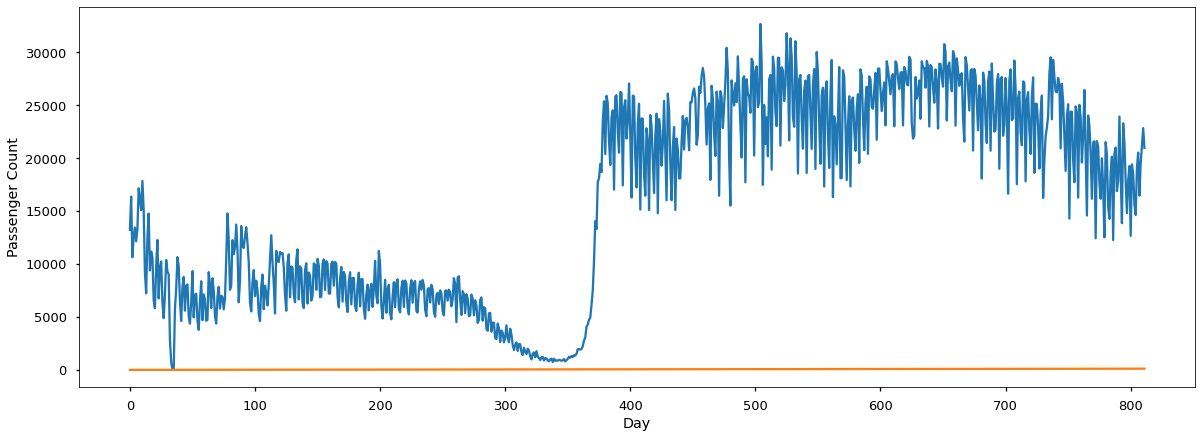

In [181]:

data.plot(figsize=(20,7), legend=None)
plt.xlabel('Day')
plt.ylabel('Passenger Count')
plt.show()

**Matrix Profile analysis with window sizes of 4, 7 and 12 days**

In [182]:
windows = [
    ('4 days', 4),
    ('7 days', 7),
    ('12 days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(data['Austin Bergstrom International (AUS) '].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

**Matrix Profile**

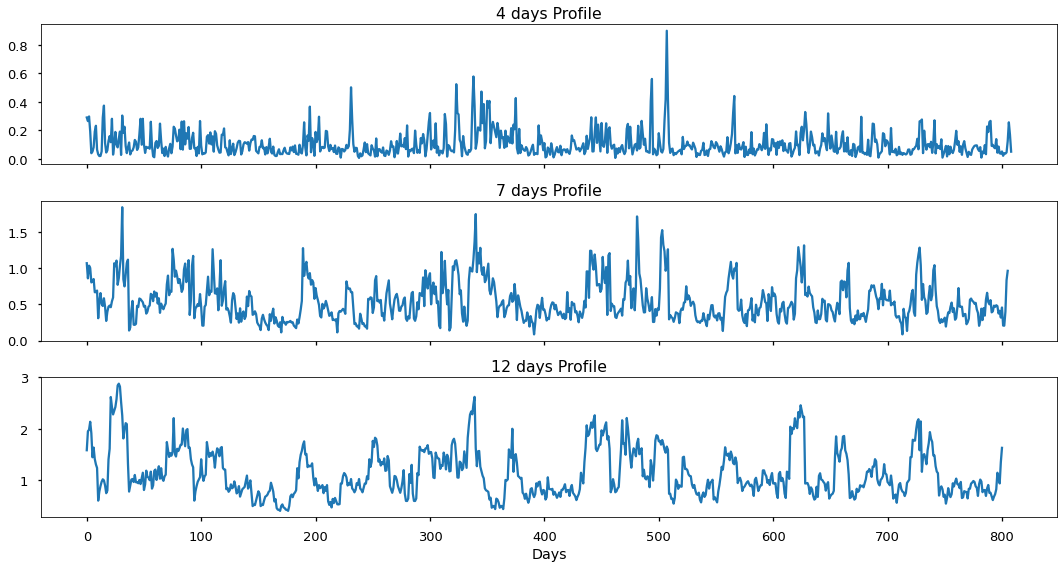

In [183]:

fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,8))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Days')
plt.tight_layout()
plt.show()

**Anomalies for each window**

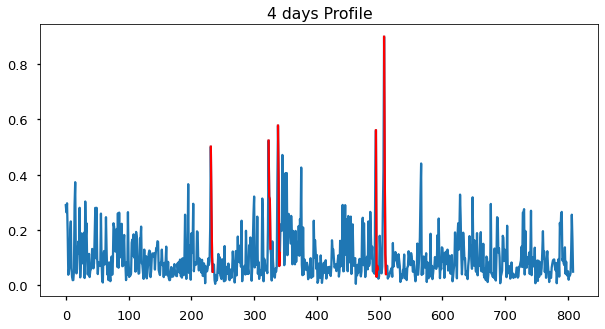

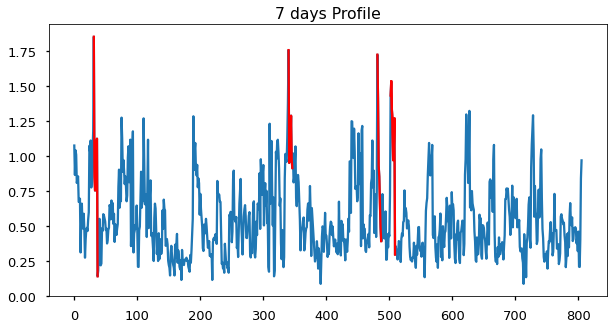

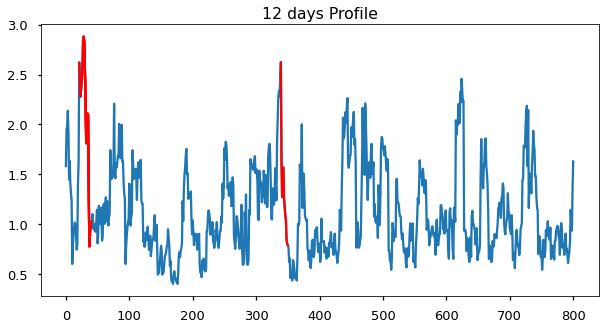

In [184]:

for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(10, 5))
    ax = plt.plot(data.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = data.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

**Discord for 7 day Profile**

In [185]:

key = '7 days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
data[key] = mp_adjusted

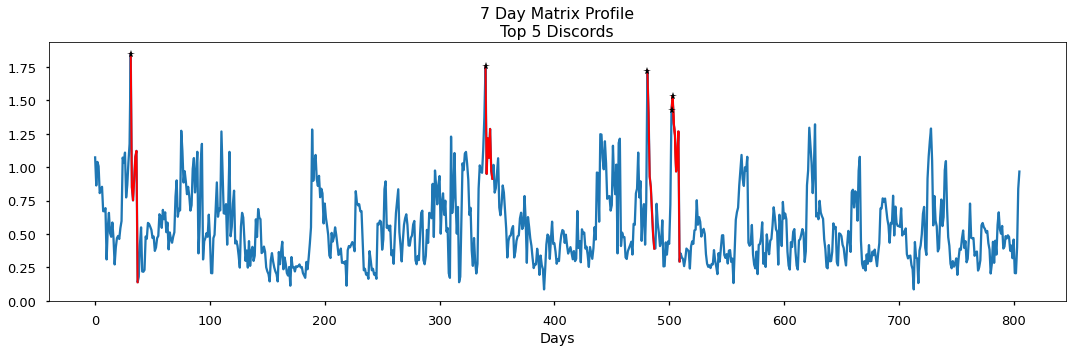

In [186]:
ax = data[key].plot(title='7 Day Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    data.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

data.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [187]:
data.columns

Index(['Austin Bergstrom International (AUS) ', 'Day', 'Week',
       '7 days Profile'],
      dtype='object')

In [188]:
del data['Week']

In [189]:
del data['7 days Profile']

In [190]:
data

,Austin Bergstrom International (AUS),Day
0,13233,Monday
1,16360,Sunday
2,10634,Saturday
3,12608,Friday
4,13436,Thursday
...,...,...
807,16446,Saturday
808,19516,Friday
809,21204,Thursday
810,22821,Wednesday


In [191]:
busiest_day = data.groupby(["Day"]).sum().sort_values("Austin Bergstrom International (AUS) ",ascending=False)
busiest_day = busiest_day.reset_index()
busiest_day

,Day,Austin Bergstrom International (AUS)
0,Sunday,2039338
1,Friday,2035800
2,Monday,2009860
3,Thursday,1978001
4,Wednesday,1731401
5,Tuesday,1628702
6,Saturday,1514942


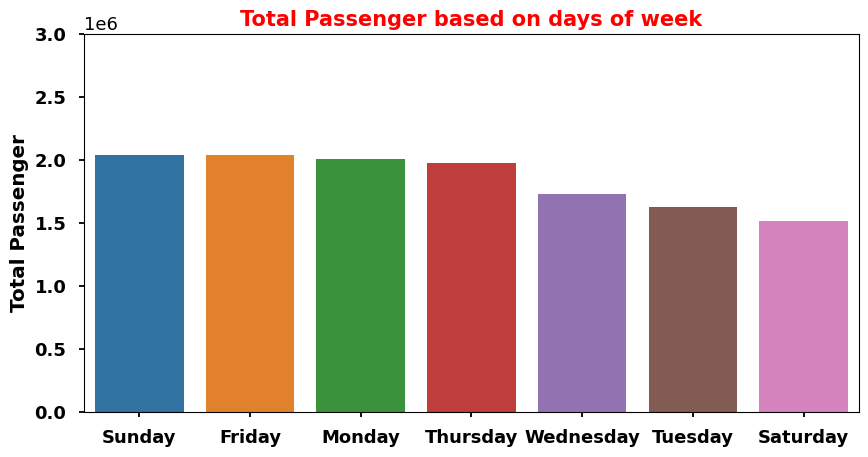

In [192]:
plt.figure(figsize=(10,5),dpi=100),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="Day",y="Austin Bergstrom International (AUS) ",data=busiest_day)

plt.title("Total Passenger based on days of week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Passenger",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,3000000)
plt.show()

**Submitted By:**

**Sakshi Pandey**

**Indian Institute Of Technology, Indore**